<a href="https://colab.research.google.com/github/udlbook/iclimbtrees/blob/main/notebooks/ShallowNN/NeuralNetworkExample2D_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural network example 2D answers**

The purpose of this notebook is to gain some familiarity with shallow neural networks with two inputs.  It works through an example similar to the interactive figure in the text and experiments with different activation functions. <br>

You can save a local copy of this notebook in your Google account and work through it in Colab (recommended) or you can download the notebook and run it locally using Jupyter notebook or similar.

Contact me at iclimbtreesmail@gmail.com if you find any mistakes or have any suggestions.


In [5]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt
# Import custom colormaps
from matplotlib import cm
from matplotlib.colors import ListedColormap

# Network with 2 inputs, one output, ReLU activation

In [11]:
# Code to draw 2D heatmap function -- read it so you know what is going on, but you don't have to change it
def draw_2D_function(ax, x1_mesh, x2_mesh, y):
    # Define pretty colormap
    my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
    my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
    r = np.floor(my_colormap_vals_dec/(256*256))
    g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
    b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
    my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = my_colormap, vmin=-1.2,vmax=1.2)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-1.2,1.2,0.1)
    ax.contour(x1_mesh, x2_mesh, y, levels, colors=['#80808080'])

# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
def plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3):
  fig, ax = plt.subplots(3,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
  draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
  draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
  draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
  draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
  draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
  draw_2D_function(ax[2,0], x1,x2,w_act_1); ax[2,0].set_title('Weighted Act')
  draw_2D_function(ax[2,1], x1,x2,w_act_2); ax[2,1].set_title('Weighted Act')
  draw_2D_function(ax[2,2], x1,x2,w_act_3); ax[2,2].set_title('Weighted Act')
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y)
  ax.set_title('Network output, $y$')
  ax.set_aspect(1.0)
  plt.show()

In [15]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [16]:
# Define a shallow neural network with, two input, one output, and three hidden units
def shallow_2_1_3(x1,x2, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):
  # Compute the preactivations
  pre_1 = theta_10 + theta_11 * x1 + theta_12 * x2
  pre_2 = theta_20 + theta_21 * x1 + theta_22 * x2
  pre_3 = theta_30 + theta_31 * x1 + theta_32 * x2

  # Pass these through the ReLU function to compute the activations
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # Weight the activations using phi1, phi2 and phi3
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  # Combine the weighted activations and add phi_0 to create the output
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

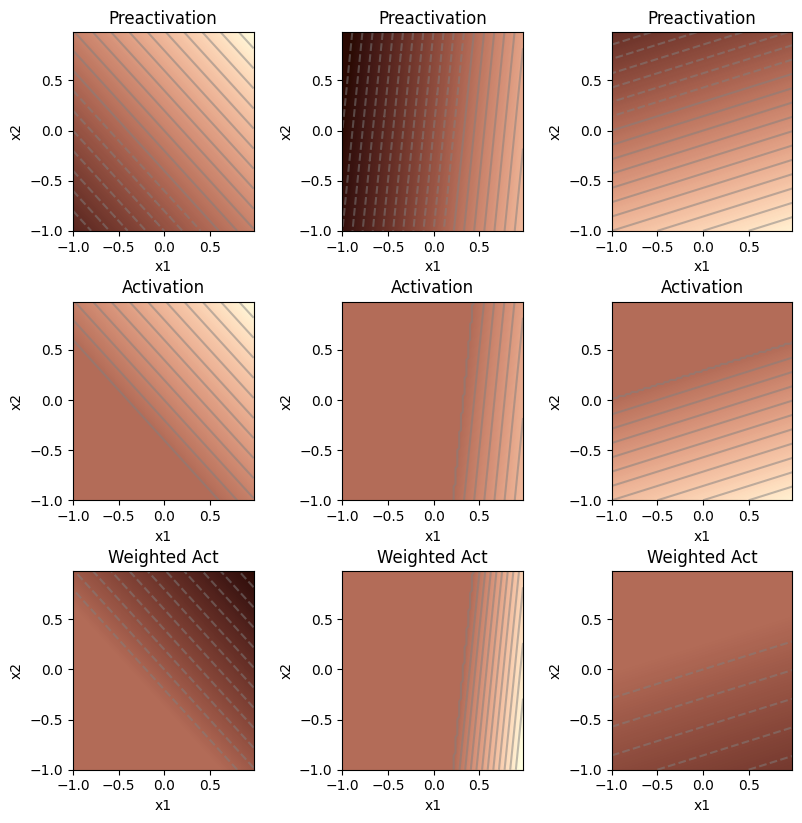

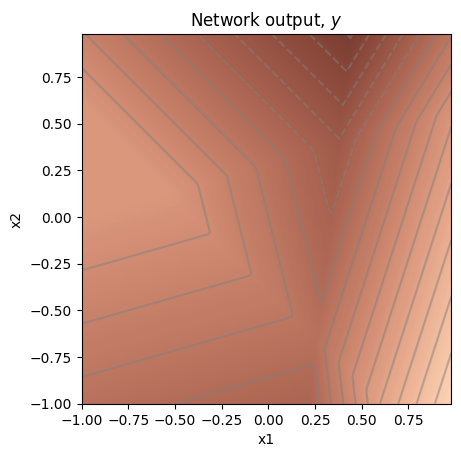

In [17]:
# Now lets define some parameters and run the neural network
theta_10 =  0.2  ; theta_11 = 0.5  ; theta_12 = 0.5
theta_20 =  -0.3 ; theta_21 = 0.9  ; theta_22 = -0.1
theta_30 =  0.2  ; theta_31 = 0.2  ; theta_32 = -0.7
phi_0 = 0.4; phi_1 = -1.0; phi_2 = 1.8; phi_3 = -0.5

x1 = np.arange(-1.0, 1.0, 0.02)
x2 = np.arange(-1.0, 1.0, 0.02)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_2_1_3(x1,x2, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# And then plot it
plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3)

How many different linear polytopes are made by this model?  

Answer:  There are 9 linear polytopes, created by the intersections of three 2D lines created by the three hidden units.   For example, there is a triangular region in the middle, and a flat region in the center left.


# Network with 2 inputs, one output, sigmoid activation

Let's take a look at what happens if we use a different activation function.  We'll use the sigmoid function

In [19]:
# Define the sigmoid function
def sigmoid(preactivation):

  activation = 1/(1+np.exp(-preactivation*5))

  return activation

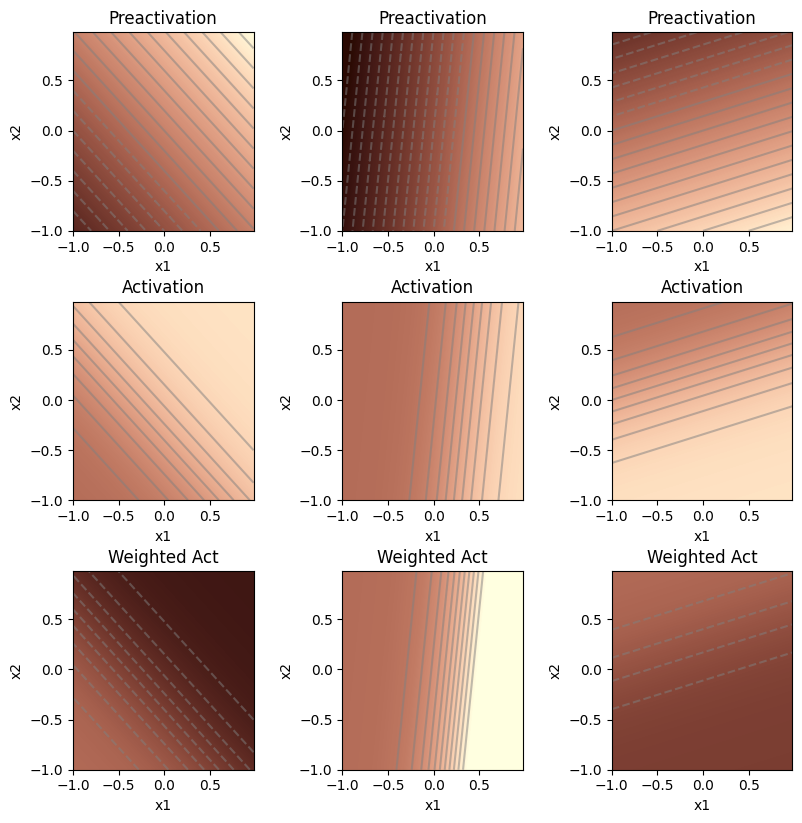

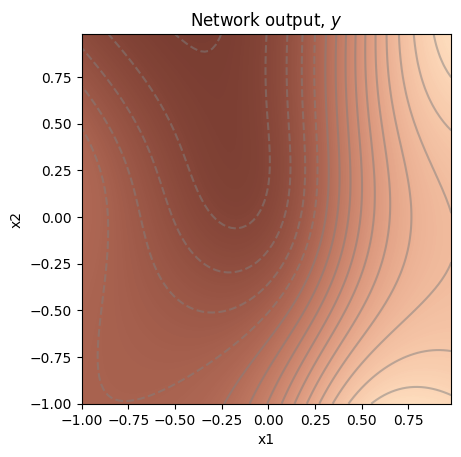

In [20]:
# Now lets define some parameters and run the neural network
theta_10 =  0.2  ; theta_11 = 0.5  ; theta_12 = 0.5
theta_20 =  -0.3 ; theta_21 = 0.9  ; theta_22 = -0.1
theta_30 =  0.2  ; theta_31 = 0.2  ; theta_32 = -0.7
phi_0 = 0.4; phi_1 = -1.0; phi_2 = 1.8; phi_3 = -0.5

x1 = np.arange(-1.0, 1.0, 0.02)
x2 = np.arange(-1.0, 1.0, 0.02)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_2_1_3(x1,x2, sigmoid, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# And then plot it
plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3)

# Network with 2 inputs, two outputs, ReLU activation

Now we'll extend this model to have two outputs $y_1$ and $y_2$, each of which can be visualized with a separate heatmap.  You will now have sets of parameters $\phi_{10}, \phi_{11}, \phi_{12}, \phi_{13}$ and $\phi_{20}, \phi_{21}, \phi_{22}, \phi_{23}$ that correspond to each of these outputs.

In [21]:
# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
def plot_neural_2_inputs_2_outputs(x1,x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23):

  # Plot intermediate plots if flag set
  fig, ax = plt.subplots(4,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
  draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
  draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
  draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
  draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
  draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
  draw_2D_function(ax[2,0], x1,x2,w_act_11); ax[2,0].set_title('Weighted Act 1')
  draw_2D_function(ax[2,1], x1,x2,w_act_12); ax[2,1].set_title('Weighted Act 1')
  draw_2D_function(ax[2,2], x1,x2,w_act_13); ax[2,2].set_title('Weighted Act 1')
  draw_2D_function(ax[3,0], x1,x2,w_act_21); ax[3,0].set_title('Weighted Act 2')
  draw_2D_function(ax[3,1], x1,x2,w_act_22); ax[3,1].set_title('Weighted Act 2')
  draw_2D_function(ax[3,2], x1,x2,w_act_23); ax[3,2].set_title('Weighted Act 2')
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y1)
  ax.set_title('Network output, $y_1$')
  ax.set_aspect(1.0)
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y2)
  ax.set_title('Network output, $y_2$')
  ax.set_aspect(1.0)
  plt.show()

In [23]:
# Define a shallow neural network with, two inputs, two outputs, and three hidden units
def shallow_2_2_3(x1,x2, activation_fn, phi_10,phi_11,phi_12,phi_13, phi_20,phi_21,phi_22,phi_23, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):

  # Compute preactivations
  pre_1 = theta_10 + theta_11 * x1 + theta_12 * x2
  pre_2 = theta_20 + theta_21 * x1 + theta_22 * x2
  pre_3 = theta_30 + theta_31 * x1 + theta_32 * x2

  # Pass these through the ReLU function to compute the activations
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # Compute weighted activations
  w_act_11 = phi_11 * act_1
  w_act_12 = phi_12 * act_2
  w_act_13 = phi_13 * act_3

  w_act_21 = phi_21 * act_1
  w_act_22 = phi_22 * act_2
  w_act_23 = phi_23 * act_3

  # Compute outputs
  y1 = phi_10 + w_act_11 + w_act_12 + w_act_13
  y2 = phi_20 + w_act_21 + w_act_22 + w_act_23

  # Return everything we have calculated
  return y1,y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23


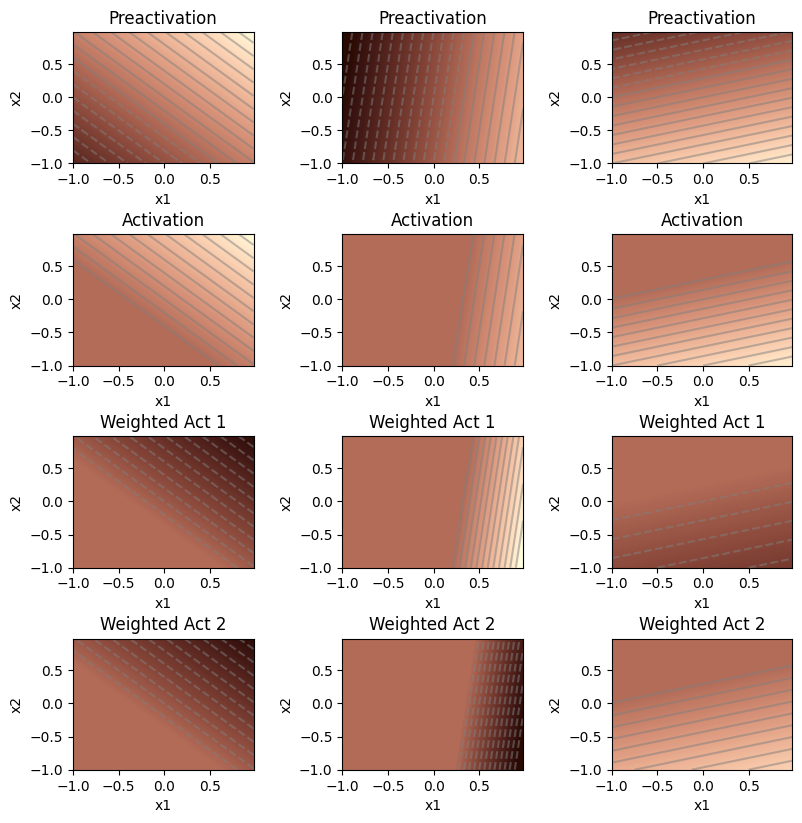

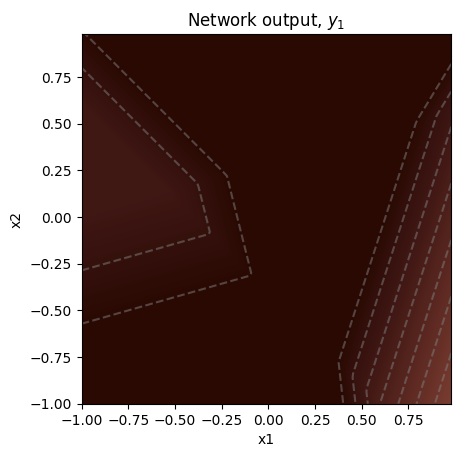

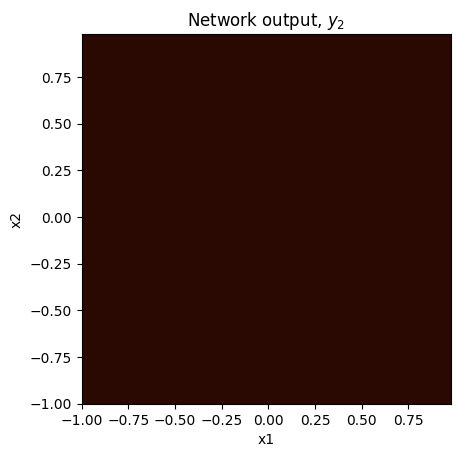

In [27]:
# Now lets define some parameters and run the neural network
theta_10 =  0.2  ; theta_11 = 0.5  ; theta_12 = 0.5
theta_20 =  -0.3 ; theta_21 = 0.9  ; theta_22 = -0.1
theta_30 =  0.2  ; theta_31 = 0.2  ; theta_32 = -0.7
phi_0 = 0.4; phi_11 = -1.0; phi_12 = 1.8; phi_13 = -0.5
phi_20 = -2.0; phi_21 = -1.0; phi_22 = -2.0; phi_23 = 0.8

x1 = np.arange(-1.0, 1.0, 0.02)
x2 = np.arange(-1.0, 1.0, 0.02)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# We run the neural network for each of these input values
y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23 = \
    shallow_2_2_3(x1,x2, ReLU, phi_10,phi_11,phi_12,phi_13, phi_20,phi_21,phi_22,phi_23, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# And then plot it
plot_neural_2_inputs_2_outputs(x1,x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23)